In [1]:
dataset_path = '../datasets/ourdata/'
#dataset_path = '../datasets/crowdsignals.io/csv-participant-one/'
result_dataset_path = './intermediate_datafiles/'


In [2]:
# Import the relevant classes.

from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os

In [3]:
if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

In [60]:
# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second


In [69]:

granularities = [100, 1000]
datasets = []

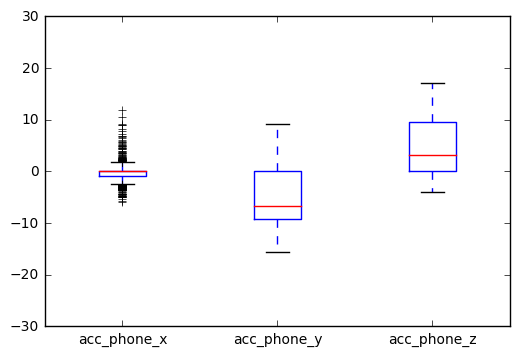

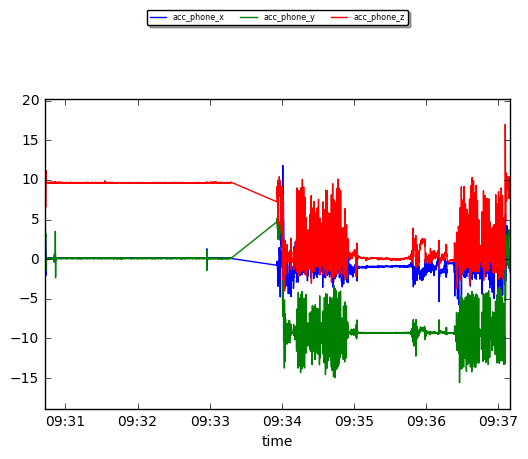

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0985005170631 -0.2851875 1.16022916969 -5.931874105 11.82735625
acc_phone_y 0.0985005170631 -4.80733303974 4.91407059036 -15.581464625 9.1401043
acc_phone_z 0.0985005170631 4.84125060645 4.64113667166 -4.00612940789 17.0164734211


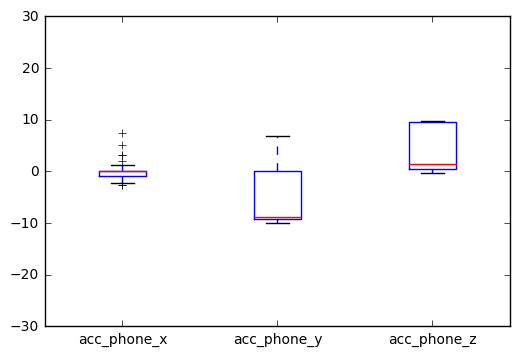

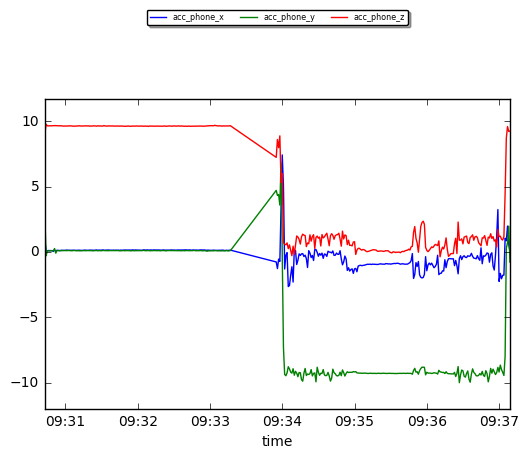

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0956072351421 -0.287451696079 0.865197778685 -2.65047703065 7.42726972292
acc_phone_y 0.0956072351421 -4.77614057181 4.80221037877 -10.0079546219 6.799341294
acc_phone_z 0.0956072351421 4.85397093201 4.4719407312 -0.372209028791 9.7679599515


In [70]:

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')


    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

  
    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_'], ['like'], ['line'])


    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))


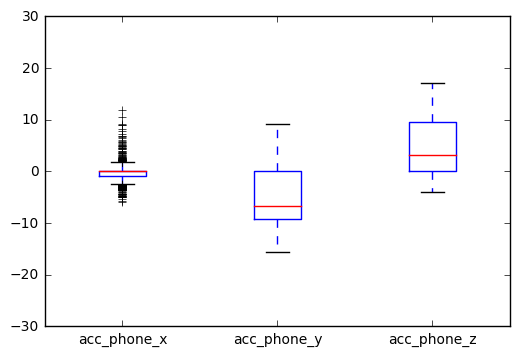

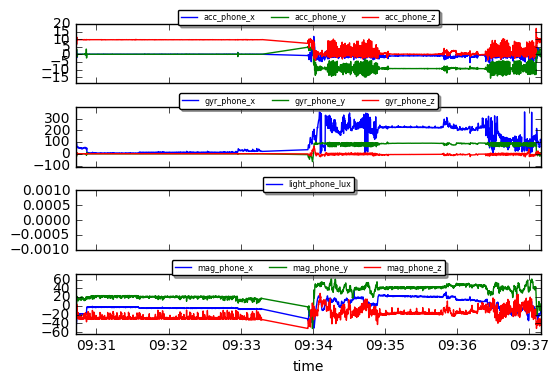

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0985005170631 -0.2851875 1.16022916969 -5.931874105 11.82735625
acc_phone_y 0.0985005170631 -4.80733303974 4.91407059036 -15.581464625 9.1401043
acc_phone_z 0.0985005170631 4.84125060645 4.64113667166 -4.00612940789 17.0164734211
gyr_phone_x 0.0985005170631 115.235047643 102.897294765 3.26899999 355.879998
gyr_phone_y 0.0985005170631 44.8779827094 44.1744653535 -66.4139986 99.8289981
gyr_phone_z 0.0985005170631 -1.82596176942 6.35443434456 -25.9859996 64.2209991
light_phone_lux 1.0 nan nan nan nan
mag_phone_x 0.0985005170631 2.16374529548 13.377553757 -50.53125 34.325
mag_phone_y 0.0985005170631 30.5462745238 14.4169123047 -51.71875 61.54375
mag_phone_z 0.0985005170631 -19.6111519283 11.2617657512 -51.5729166667 28.50625


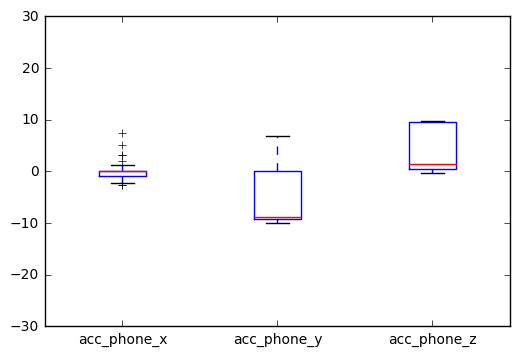

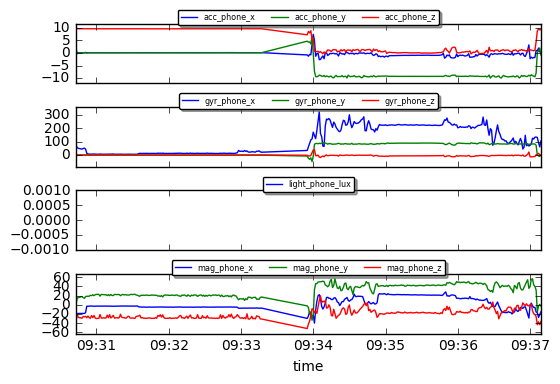

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0956072351421 -0.287451696079 0.865197778685 -2.65047703065 7.42726972292
acc_phone_y 0.0956072351421 -4.77614057181 4.80221037877 -10.0079546219 6.799341294
acc_phone_z 0.0956072351421 4.85397093201 4.4719407312 -0.372209028791 9.7679599515
gyr_phone_x 0.0956072351421 114.978581502 99.7419807109 5.388799936 323.7787952
gyr_phone_y 0.0956072351421 44.6602123364 43.9652990037 -48.87799928 92.00079832
gyr_phone_z 0.0956072351421 -1.82906547803 5.33514439669 -18.522699766 40.7386994
light_phone_lux 1.0 nan nan nan nan
mag_phone_x 0.0956072351421 2.07910979723 13.2896827981 -39.841875 27.88625
mag_phone_y 0.0956072351421 30.4105166637 14.3042016948 -33.600625 56.283125
mag_phone_z 0.0956072351421 -19.7058950569 10.0087482353 -51.5729166667 19.464375


In [71]:

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    #DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('gyroscope.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')


    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    #DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('light.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('magnetometer.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
    

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'light_phone_lux', 'mag_'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line', 'line'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))


In [ ]:

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')
